In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

#this is a python magic function to automatically show matplotlib plots
%matplotlib inline   

In [2]:
june_trips = pd.read_csv('../data/june_trip.csv')

In [3]:
#converting date/times to date/times
june_trips.startTime = pd.to_datetime(june_trips.startTime)
june_trips.startDate = pd.to_datetime(june_trips.startDate)
june_trips.endTime = pd.to_datetime(june_trips.endTime)
june_trips.endDate = pd.to_datetime(june_trips.endDate)
june_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205627 entries, 0 to 205626
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   pubTimeStamp    205627 non-null  object        
 1   companyName     205627 non-null  object        
 2   tripRecordNum   205627 non-null  object        
 3   sumdID          205627 non-null  object        
 4   tripDuration    205627 non-null  float64       
 5   tripDistance    205627 non-null  float64       
 6   startDate       205627 non-null  datetime64[ns]
 7   startTime       205627 non-null  datetime64[ns]
 8   endDate         205627 non-null  datetime64[ns]
 9   endTime         205627 non-null  datetime64[ns]
 10  startLatitude   205627 non-null  float64       
 11  startLongitude  205627 non-null  float64       
 12  endLatitude     205627 non-null  float64       
 13  endLongitude    205627 non-null  float64       
 14  tripRoute       205627 non-null  obj

In [4]:
june_trips['startTime_clean'] = pd.DatetimeIndex(june_trips['startTime']).time
june_trips['endTime_clean'] = pd.DatetimeIndex(june_trips['endTime']).time
june_trips.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,startTime_clean,endTime_clean
0,2019-06-01 00:05:46.817000,Bird,BRD3572,PoweredSPI1T,4.0,328.084000,2019-06-01,2021-03-22 00:02:18.203333,2019-06-01,2021-03-22 00:06:16.406666,36.164400,-86.78070,36.163600,-86.780200,"[[36.164679,-86.781089],[36.163693,-86.78011],...",2019-06-02 05:30:19.960000,00:02:18.203333,00:06:16.406666
1,2019-06-01 00:05:46.817000,Bird,BRD3571,Powered2I3MS,5.0,4921.260000,2019-06-01,2021-03-22 00:02:44.803333,2019-06-01,2021-03-22 00:07:28.286666,36.175300,-86.79430,36.175300,-86.794300,"[[36.175367,-86.794232],[36.175367,-86.794232]...",2019-06-02 05:30:19.927000,00:02:44.803333,00:07:28.286666
2,2019-06-01 00:09:54,Gotcha,GOT1,Powered327,12.0,12.426575,2019-06-01,2021-03-22 00:09:56.000000,2019-06-01,2021-03-22 00:21:56.000000,36.161501,-86.77601,36.152529,-86.783742,"[[""36.16149"",""-86.77605000000001""]]",2019-06-06 22:23:08.673000,00:09:56,00:21:56
3,2019-06-01 00:10:46.957000,Bird,BRD3610,Powered8U1A6,2.0,0.000000,2019-06-01,2021-03-22 00:10:31.163333,2019-06-01,2021-03-22 00:12:02.773333,36.164000,-86.78070,36.163100,-86.779700,"[[36.163168,-86.779639]]",2019-06-02 05:30:20.283000,00:10:31.163333,00:12:02.773333
4,2019-06-01 00:10:46.957000,Bird,BRD3612,PoweredSPI1T,5.0,656.168000,2019-06-01,2021-03-22 00:07:21.430000,2019-06-01,2021-03-22 00:12:30.913333,36.165000,-86.77990,36.165900,-86.777800,"[[36.164951,-86.779836],[36.16494,-86.779456],...",2019-06-02 05:30:20.347000,00:07:21.430000,00:12:30.913333


In [5]:
june_trips['startDate'] = june_trips['startDate'].astype('str')
june_trips['startTime_clean'] = june_trips['startTime_clean'].astype('str')
june_trips['startDateTime_clean'] = june_trips['startDate'] + ' ' + june_trips['startTime_clean']
june_trips['endDate'] = june_trips['endDate'].astype('str')
june_trips['endTime_clean'] = june_trips['endTime_clean'].astype('str')
june_trips['endDateTime_clean'] = june_trips['endDate'] + ' ' + june_trips['endTime_clean']
june_trips.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,startTime_clean,endTime_clean,startDateTime_clean,endDateTime_clean
0,2019-06-01 00:05:46.817000,Bird,BRD3572,PoweredSPI1T,4.0,328.084000,2019-06-01,2021-03-22 00:02:18.203333,2019-06-01,2021-03-22 00:06:16.406666,36.164400,-86.78070,36.163600,-86.780200,"[[36.164679,-86.781089],[36.163693,-86.78011],...",2019-06-02 05:30:19.960000,00:02:18.203333,00:06:16.406666,2019-06-01 00:02:18.203333,2019-06-01 00:06:16.406666
1,2019-06-01 00:05:46.817000,Bird,BRD3571,Powered2I3MS,5.0,4921.260000,2019-06-01,2021-03-22 00:02:44.803333,2019-06-01,2021-03-22 00:07:28.286666,36.175300,-86.79430,36.175300,-86.794300,"[[36.175367,-86.794232],[36.175367,-86.794232]...",2019-06-02 05:30:19.927000,00:02:44.803333,00:07:28.286666,2019-06-01 00:02:44.803333,2019-06-01 00:07:28.286666
2,2019-06-01 00:09:54,Gotcha,GOT1,Powered327,12.0,12.426575,2019-06-01,2021-03-22 00:09:56.000000,2019-06-01,2021-03-22 00:21:56.000000,36.161501,-86.77601,36.152529,-86.783742,"[[""36.16149"",""-86.77605000000001""]]",2019-06-06 22:23:08.673000,00:09:56,00:21:56,2019-06-01 00:09:56,2019-06-01 00:21:56
3,2019-06-01 00:10:46.957000,Bird,BRD3610,Powered8U1A6,2.0,0.000000,2019-06-01,2021-03-22 00:10:31.163333,2019-06-01,2021-03-22 00:12:02.773333,36.164000,-86.78070,36.163100,-86.779700,"[[36.163168,-86.779639]]",2019-06-02 05:30:20.283000,00:10:31.163333,00:12:02.773333,2019-06-01 00:10:31.163333,2019-06-01 00:12:02.773333
4,2019-06-01 00:10:46.957000,Bird,BRD3612,PoweredSPI1T,5.0,656.168000,2019-06-01,2021-03-22 00:07:21.430000,2019-06-01,2021-03-22 00:12:30.913333,36.165000,-86.77990,36.165900,-86.777800,"[[36.164951,-86.779836],[36.16494,-86.779456],...",2019-06-02 05:30:20.347000,00:07:21.430000,00:12:30.913333,2019-06-01 00:07:21.430000,2019-06-01 00:12:30.913333


In [6]:
june_trips.endDateTime_clean = pd.to_datetime(june_trips.endDateTime_clean)
june_trips.startDateTime_clean = pd.to_datetime(june_trips.startDateTime_clean)
june_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205627 entries, 0 to 205626
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   pubTimeStamp         205627 non-null  object        
 1   companyName          205627 non-null  object        
 2   tripRecordNum        205627 non-null  object        
 3   sumdID               205627 non-null  object        
 4   tripDuration         205627 non-null  float64       
 5   tripDistance         205627 non-null  float64       
 6   startDate            205627 non-null  object        
 7   startTime            205627 non-null  datetime64[ns]
 8   endDate              205627 non-null  object        
 9   endTime              205627 non-null  datetime64[ns]
 10  startLatitude        205627 non-null  float64       
 11  startLongitude       205627 non-null  float64       
 12  endLatitude          205627 non-null  float64       
 13  endLongitude  

In [7]:
june_trips['duration_clean'] = june_trips['endDateTime_clean'] - june_trips['startDateTime_clean']
june_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205627 entries, 0 to 205626
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype          
---  ------               --------------   -----          
 0   pubTimeStamp         205627 non-null  object         
 1   companyName          205627 non-null  object         
 2   tripRecordNum        205627 non-null  object         
 3   sumdID               205627 non-null  object         
 4   tripDuration         205627 non-null  float64        
 5   tripDistance         205627 non-null  float64        
 6   startDate            205627 non-null  object         
 7   startTime            205627 non-null  datetime64[ns] 
 8   endDate              205627 non-null  object         
 9   endTime              205627 non-null  datetime64[ns] 
 10  startLatitude        205627 non-null  float64        
 11  startLongitude       205627 non-null  float64        
 12  endLatitude          205627 non-null  float64        
 13 

In [8]:
#converting to a usable type. 
june_trips['duration_sec'] = (june_trips.duration_clean / np.timedelta64(1,'s')).astype(int)
june_trips.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,...,endLatitude,endLongitude,tripRoute,create_dt,startTime_clean,endTime_clean,startDateTime_clean,endDateTime_clean,duration_clean,duration_sec
0,2019-06-01 00:05:46.817000,Bird,BRD3572,PoweredSPI1T,4.0,328.084000,2019-06-01,2021-03-22 00:02:18.203333,2019-06-01,2021-03-22 00:06:16.406666,...,36.163600,-86.780200,"[[36.164679,-86.781089],[36.163693,-86.78011],...",2019-06-02 05:30:19.960000,00:02:18.203333,00:06:16.406666,2019-06-01 00:02:18.203333,2019-06-01 00:06:16.406666,0 days 00:03:58.203333,238
1,2019-06-01 00:05:46.817000,Bird,BRD3571,Powered2I3MS,5.0,4921.260000,2019-06-01,2021-03-22 00:02:44.803333,2019-06-01,2021-03-22 00:07:28.286666,...,36.175300,-86.794300,"[[36.175367,-86.794232],[36.175367,-86.794232]...",2019-06-02 05:30:19.927000,00:02:44.803333,00:07:28.286666,2019-06-01 00:02:44.803333,2019-06-01 00:07:28.286666,0 days 00:04:43.483333,283
2,2019-06-01 00:09:54,Gotcha,GOT1,Powered327,12.0,12.426575,2019-06-01,2021-03-22 00:09:56.000000,2019-06-01,2021-03-22 00:21:56.000000,...,36.152529,-86.783742,"[[""36.16149"",""-86.77605000000001""]]",2019-06-06 22:23:08.673000,00:09:56,00:21:56,2019-06-01 00:09:56.000000,2019-06-01 00:21:56.000000,0 days 00:12:00,720
3,2019-06-01 00:10:46.957000,Bird,BRD3610,Powered8U1A6,2.0,0.000000,2019-06-01,2021-03-22 00:10:31.163333,2019-06-01,2021-03-22 00:12:02.773333,...,36.163100,-86.779700,"[[36.163168,-86.779639]]",2019-06-02 05:30:20.283000,00:10:31.163333,00:12:02.773333,2019-06-01 00:10:31.163333,2019-06-01 00:12:02.773333,0 days 00:01:31.610000,91
4,2019-06-01 00:10:46.957000,Bird,BRD3612,PoweredSPI1T,5.0,656.168000,2019-06-01,2021-03-22 00:07:21.430000,2019-06-01,2021-03-22 00:12:30.913333,...,36.165900,-86.777800,"[[36.164951,-86.779836],[36.16494,-86.779456],...",2019-06-02 05:30:20.347000,00:07:21.430000,00:12:30.913333,2019-06-01 00:07:21.430000,2019-06-01 00:12:30.913333,0 days 00:05:09.483333,309


In [9]:
june_trips['duration_sec'] = (june_trips.duration_clean / np.timedelta64(1,'s')).astype(int)
june_trips['duration_min'] = june_trips.duration_sec / 60
june_trips.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,...,endLongitude,tripRoute,create_dt,startTime_clean,endTime_clean,startDateTime_clean,endDateTime_clean,duration_clean,duration_sec,duration_min
0,2019-06-01 00:05:46.817000,Bird,BRD3572,PoweredSPI1T,4.0,328.084000,2019-06-01,2021-03-22 00:02:18.203333,2019-06-01,2021-03-22 00:06:16.406666,...,-86.780200,"[[36.164679,-86.781089],[36.163693,-86.78011],...",2019-06-02 05:30:19.960000,00:02:18.203333,00:06:16.406666,2019-06-01 00:02:18.203333,2019-06-01 00:06:16.406666,0 days 00:03:58.203333,238,3.966667
1,2019-06-01 00:05:46.817000,Bird,BRD3571,Powered2I3MS,5.0,4921.260000,2019-06-01,2021-03-22 00:02:44.803333,2019-06-01,2021-03-22 00:07:28.286666,...,-86.794300,"[[36.175367,-86.794232],[36.175367,-86.794232]...",2019-06-02 05:30:19.927000,00:02:44.803333,00:07:28.286666,2019-06-01 00:02:44.803333,2019-06-01 00:07:28.286666,0 days 00:04:43.483333,283,4.716667
2,2019-06-01 00:09:54,Gotcha,GOT1,Powered327,12.0,12.426575,2019-06-01,2021-03-22 00:09:56.000000,2019-06-01,2021-03-22 00:21:56.000000,...,-86.783742,"[[""36.16149"",""-86.77605000000001""]]",2019-06-06 22:23:08.673000,00:09:56,00:21:56,2019-06-01 00:09:56.000000,2019-06-01 00:21:56.000000,0 days 00:12:00,720,12.000000
3,2019-06-01 00:10:46.957000,Bird,BRD3610,Powered8U1A6,2.0,0.000000,2019-06-01,2021-03-22 00:10:31.163333,2019-06-01,2021-03-22 00:12:02.773333,...,-86.779700,"[[36.163168,-86.779639]]",2019-06-02 05:30:20.283000,00:10:31.163333,00:12:02.773333,2019-06-01 00:10:31.163333,2019-06-01 00:12:02.773333,0 days 00:01:31.610000,91,1.516667
4,2019-06-01 00:10:46.957000,Bird,BRD3612,PoweredSPI1T,5.0,656.168000,2019-06-01,2021-03-22 00:07:21.430000,2019-06-01,2021-03-22 00:12:30.913333,...,-86.777800,"[[36.164951,-86.779836],[36.16494,-86.779456],...",2019-06-02 05:30:20.347000,00:07:21.430000,00:12:30.913333,2019-06-01 00:07:21.430000,2019-06-01 00:12:30.913333,0 days 00:05:09.483333,309,5.150000


In [10]:
june_trips = june_trips.drop(columns = ['duration_sec', 'startTime_clean', 'endTime_clean', 'tripDuration', 'startDate', 'startTime', 'endDate', 'endTime'])
june_trips.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDistance,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,startDateTime_clean,endDateTime_clean,duration_clean,duration_min
0,2019-06-01 00:05:46.817000,Bird,BRD3572,PoweredSPI1T,328.084000,36.164400,-86.78070,36.163600,-86.780200,"[[36.164679,-86.781089],[36.163693,-86.78011],...",2019-06-02 05:30:19.960000,2019-06-01 00:02:18.203333,2019-06-01 00:06:16.406666,0 days 00:03:58.203333,3.966667
1,2019-06-01 00:05:46.817000,Bird,BRD3571,Powered2I3MS,4921.260000,36.175300,-86.79430,36.175300,-86.794300,"[[36.175367,-86.794232],[36.175367,-86.794232]...",2019-06-02 05:30:19.927000,2019-06-01 00:02:44.803333,2019-06-01 00:07:28.286666,0 days 00:04:43.483333,4.716667
2,2019-06-01 00:09:54,Gotcha,GOT1,Powered327,12.426575,36.161501,-86.77601,36.152529,-86.783742,"[[""36.16149"",""-86.77605000000001""]]",2019-06-06 22:23:08.673000,2019-06-01 00:09:56.000000,2019-06-01 00:21:56.000000,0 days 00:12:00,12.000000
3,2019-06-01 00:10:46.957000,Bird,BRD3610,Powered8U1A6,0.000000,36.164000,-86.78070,36.163100,-86.779700,"[[36.163168,-86.779639]]",2019-06-02 05:30:20.283000,2019-06-01 00:10:31.163333,2019-06-01 00:12:02.773333,0 days 00:01:31.610000,1.516667
4,2019-06-01 00:10:46.957000,Bird,BRD3612,PoweredSPI1T,656.168000,36.165000,-86.77990,36.165900,-86.777800,"[[36.164951,-86.779836],[36.16494,-86.779456],...",2019-06-02 05:30:20.347000,2019-06-01 00:07:21.430000,2019-06-01 00:12:30.913333,0 days 00:05:09.483333,5.150000


In [11]:
june_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205627 entries, 0 to 205626
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype          
---  ------               --------------   -----          
 0   pubTimeStamp         205627 non-null  object         
 1   companyName          205627 non-null  object         
 2   tripRecordNum        205627 non-null  object         
 3   sumdID               205627 non-null  object         
 4   tripDistance         205627 non-null  float64        
 5   startLatitude        205627 non-null  float64        
 6   startLongitude       205627 non-null  float64        
 7   endLatitude          205627 non-null  float64        
 8   endLongitude         205627 non-null  float64        
 9   tripRoute            205627 non-null  object         
 10  create_dt            205627 non-null  object         
 11  startDateTime_clean  205627 non-null  datetime64[ns] 
 12  endDateTime_clean    205627 non-null  datetime64[ns] 
 13 

## Calculation of Outliers

gonna create a sub to exclude outliers (using the technical def of 3rd - 1st quartile * 1.5)<br>
18.02 - 5.01 = 13.01<br>
13.01 1.5 = 19.515<br>
19.515 + 18.02 = 37.535

In [12]:
#removing outliers
june_adj = june_trips.loc[(june_trips.duration_min < 38)]
june_adj.describe()

,tripDistance,startLatitude,startLongitude,endLatitude,endLongitude,duration_clean,duration_min
count,1.902460e+05,190246.000000,190246.000000,190246.000000,190246.000000,190246,190246.000000
mean,4.349438e+03,36.156241,-86.784507,36.156196,-86.784355,0 days 00:11:12.410554019,11.203056
std,4.514392e+04,0.012123,0.013759,0.175972,0.630861,0 days 00:08:24.018744711,8.400527
min,-5.157480e+05,36.042892,-86.917893,-36.850405,-122.428964,-1 days +23:51:59.776666,-8.000000
25%,7.545840e+02,36.150700,-86.791910,36.150897,-86.791900,0 days 00:04:44.771667,4.733333
50%,3.021617e+03,36.157100,-86.782060,36.157521,-86.781717,0 days 00:08:53.199999500,8.883333
75%,6.220470e+03,36.163037,-86.776520,36.163019,-86.776447,0 days 00:15:38,15.633333
max,1.848950e+07,36.300029,-86.602127,47.613101,174.764886,0 days 00:37:59.673333,37.983333


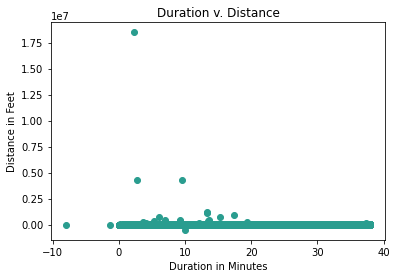

In [13]:
plt.scatter('duration_min', 'tripDistance', data = june_adj, color = '#2a9d8f')
plt.xlabel('Duration in Minutes')
plt.ylabel('Distance in Feet')
plt.title('Duration v. Distance')
plt.show()

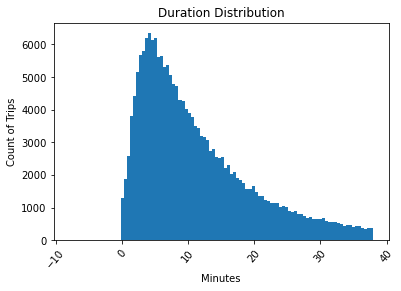

In [14]:
plt.hist(june_adj.duration_min, bins = 100)
plt.xticks(rotation=50)
plt.title('Duration Distribution')
plt.xlabel('Minutes')
plt.ylabel('Count of Trips')
plt.show()

In [15]:
negs_adj = june_trips.loc[(june_trips.duration_min < 0)]
negs = negs_adj[['tripDistance', 'companyName', 'startDateTime_clean', 'endDateTime_clean', 'duration_min', 'tripRoute']]
negs

,tripDistance,companyName,startDateTime_clean,endDateTime_clean,duration_min,tripRoute
152653,3484.25208,Lyft,2019-06-21 21:32:09.170000,2019-06-21 21:24:08.946666,-8.00,"[[36.15561,-86.77505],[36.15565,-86.77509],[36..."
153144,3166.01060,Lyft,2019-06-21 22:23:01.316666,2019-06-21 22:21:39.726666,-1.35,"[[36.16213,-86.77958],[36.16206,-86.77953],[36..."


In [16]:
june_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205627 entries, 0 to 205626
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype          
---  ------               --------------   -----          
 0   pubTimeStamp         205627 non-null  object         
 1   companyName          205627 non-null  object         
 2   tripRecordNum        205627 non-null  object         
 3   sumdID               205627 non-null  object         
 4   tripDistance         205627 non-null  float64        
 5   startLatitude        205627 non-null  float64        
 6   startLongitude       205627 non-null  float64        
 7   endLatitude          205627 non-null  float64        
 8   endLongitude         205627 non-null  float64        
 9   tripRoute            205627 non-null  object         
 10  create_dt            205627 non-null  object         
 11  startDateTime_clean  205627 non-null  datetime64[ns] 
 12  endDateTime_clean    205627 non-null  datetime64[ns] 
 13 

In [17]:
june_trips.head(10)

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDistance,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,startDateTime_clean,endDateTime_clean,duration_clean,duration_min
0,2019-06-01 00:05:46.817000,Bird,BRD3572,PoweredSPI1T,328.084000,36.164400,-86.78070,36.163600,-86.780200,"[[36.164679,-86.781089],[36.163693,-86.78011],...",2019-06-02 05:30:19.960000,2019-06-01 00:02:18.203333,2019-06-01 00:06:16.406666,0 days 00:03:58.203333,3.966667
1,2019-06-01 00:05:46.817000,Bird,BRD3571,Powered2I3MS,4921.260000,36.175300,-86.79430,36.175300,-86.794300,"[[36.175367,-86.794232],[36.175367,-86.794232]...",2019-06-02 05:30:19.927000,2019-06-01 00:02:44.803333,2019-06-01 00:07:28.286666,0 days 00:04:43.483333,4.716667
2,2019-06-01 00:09:54,Gotcha,GOT1,Powered327,12.426575,36.161501,-86.77601,36.152529,-86.783742,"[[""36.16149"",""-86.77605000000001""]]",2019-06-06 22:23:08.673000,2019-06-01 00:09:56.000000,2019-06-01 00:21:56.000000,0 days 00:12:00,12.000000
3,2019-06-01 00:10:46.957000,Bird,BRD3610,Powered8U1A6,0.000000,36.164000,-86.78070,36.163100,-86.779700,"[[36.163168,-86.779639]]",2019-06-02 05:30:20.283000,2019-06-01 00:10:31.163333,2019-06-01 00:12:02.773333,0 days 00:01:31.610000,1.516667
4,2019-06-01 00:10:46.957000,Bird,BRD3612,PoweredSPI1T,656.168000,36.165000,-86.77990,36.165900,-86.777800,"[[36.164951,-86.779836],[36.16494,-86.779456],...",2019-06-02 05:30:20.347000,2019-06-01 00:07:21.430000,2019-06-01 00:12:30.913333,0 days 00:05:09.483333,5.150000
5,2019-06-01 00:10:46.957000,Bird,BRD3611,PoweredVIQLC,0.000000,36.158600,-86.77740,36.159100,-86.777300,"[[36.159172,-86.777205]]",2019-06-02 05:30:20.313000,2019-06-01 00:10:13.636666,2019-06-01 00:11:26.620000,0 days 00:01:12.983334,1.200000
6,2019-06-01 00:10:46.957000,Bird,BRD3614,Powered1PQQB,2296.588000,36.151600,-86.80210,36.151400,-86.802000,"[[36.151438,-86.801898],[36.151184,-86.802086]...",2019-06-02 05:30:20.410000,2019-06-01 00:06:11.906666,2019-06-01 00:12:34.403333,0 days 00:06:22.496667,6.366667
7,2019-06-01 00:10:46.957000,Bird,BRD3613,PoweredEVLBD,2956.036840,36.165400,-86.77970,36.168800,-86.772400,"[[36.165417,-86.779979],[36.164841,-86.781458]...",2019-06-02 05:30:20.380000,2019-06-01 00:06:57.423333,2019-06-01 00:12:24.340000,0 days 00:05:26.916667,5.433333
8,2019-06-01 00:10:46.957000,Bird,BRD3615,PoweredB9WEF,1968.504000,36.137700,-86.80090,36.137700,-86.800900,"[[36.13778,-86.800836]]",2019-06-02 05:30:20.440000,2019-06-01 00:05:09.716666,2019-06-01 00:11:41.603333,0 days 00:06:31.886667,6.516667
9,2019-06-01 00:12:04.230000,SPIN,SPI5,Powered5000596,479.002640,36.151341,-86.79977,36.150363,-86.800862,"[[36.150363247404989,-86.800861925250217],[36....",2019-06-02 09:06:15.830000,2019-06-01 00:05:45.000000,2019-06-01 00:11:26.000000,0 days 00:05:41,5.683333


In [18]:
june_trips.to_pickle("../data/june_trips_cleaned.pkl")

In [19]:
%%time
june_test = pd.read_pickle("../data/june_trips_cleaned.pkl")

Wall time: 731 ms


In [20]:
june_test.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDistance,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,startDateTime_clean,endDateTime_clean,duration_clean,duration_min
0,2019-06-01 00:05:46.817000,Bird,BRD3572,PoweredSPI1T,328.084000,36.164400,-86.78070,36.163600,-86.780200,"[[36.164679,-86.781089],[36.163693,-86.78011],...",2019-06-02 05:30:19.960000,2019-06-01 00:02:18.203333,2019-06-01 00:06:16.406666,0 days 00:03:58.203333,3.966667
1,2019-06-01 00:05:46.817000,Bird,BRD3571,Powered2I3MS,4921.260000,36.175300,-86.79430,36.175300,-86.794300,"[[36.175367,-86.794232],[36.175367,-86.794232]...",2019-06-02 05:30:19.927000,2019-06-01 00:02:44.803333,2019-06-01 00:07:28.286666,0 days 00:04:43.483333,4.716667
2,2019-06-01 00:09:54,Gotcha,GOT1,Powered327,12.426575,36.161501,-86.77601,36.152529,-86.783742,"[[""36.16149"",""-86.77605000000001""]]",2019-06-06 22:23:08.673000,2019-06-01 00:09:56.000000,2019-06-01 00:21:56.000000,0 days 00:12:00,12.000000
3,2019-06-01 00:10:46.957000,Bird,BRD3610,Powered8U1A6,0.000000,36.164000,-86.78070,36.163100,-86.779700,"[[36.163168,-86.779639]]",2019-06-02 05:30:20.283000,2019-06-01 00:10:31.163333,2019-06-01 00:12:02.773333,0 days 00:01:31.610000,1.516667
4,2019-06-01 00:10:46.957000,Bird,BRD3612,PoweredSPI1T,656.168000,36.165000,-86.77990,36.165900,-86.777800,"[[36.164951,-86.779836],[36.16494,-86.779456],...",2019-06-02 05:30:20.347000,2019-06-01 00:07:21.430000,2019-06-01 00:12:30.913333,0 days 00:05:09.483333,5.150000


In [21]:
june_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205627 entries, 0 to 205626
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype          
---  ------               --------------   -----          
 0   pubTimeStamp         205627 non-null  object         
 1   companyName          205627 non-null  object         
 2   tripRecordNum        205627 non-null  object         
 3   sumdID               205627 non-null  object         
 4   tripDistance         205627 non-null  float64        
 5   startLatitude        205627 non-null  float64        
 6   startLongitude       205627 non-null  float64        
 7   endLatitude          205627 non-null  float64        
 8   endLongitude         205627 non-null  float64        
 9   tripRoute            205627 non-null  object         
 10  create_dt            205627 non-null  object         
 11  startDateTime_clean  205627 non-null  datetime64[ns] 
 12  endDateTime_clean    205627 non-null  datetime64[ns] 
 13 